In [6]:
#Importaciones
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [7]:
#Cargando Imagen
img = cv2.imread('HulkSpiderman.jpg')

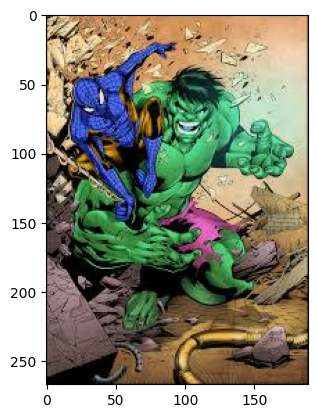

In [8]:
#Mostrando Imagen original
plt.imshow(img)
plt.show()

Pasando una imagen a Escala de Grises

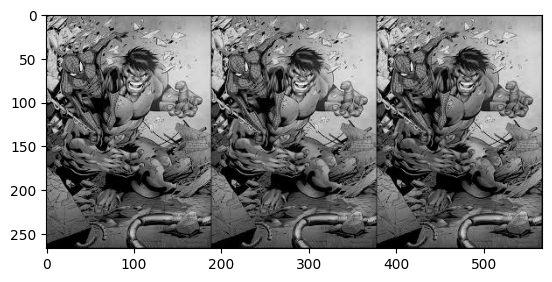

In [15]:
#OPCION 1 - Leerla directamente en escala de grises
imgGray1 = cv2.imread('HulkSpiderman.jpg', 0)

#OPCION 2 - Convertirla usando el método de CV2
imgGray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#OPCION 3 - Operando con las matrices (promedio de intensidad de pixels)
imgGray3 = (img[:,:,0]/3+img[:,:,1]/3+img[:,:,2]/3)

#Stack de imagenes para comparar
imgGrayStacked = np.hstack([imgGray1, imgGray2, imgGray3])

#Mostrando las imagenes
plt.imshow(imgGrayStacked, cmap='gray')
plt.show()


Pasando a negativo

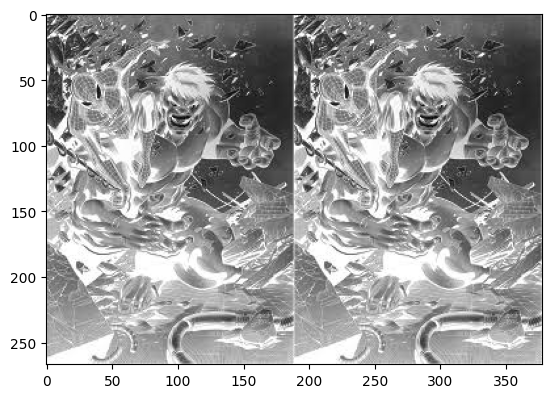

In [16]:
#OPCION 1 - Usando el método de la libería CV2
img_neg1 = cv2.bitwise_not(imgGray1)

#OPCION 2 - Usando manipulacion de pixels
img_neg2 = 255-imgGray1

#Stack de imagenes para comparar
imgNegStacked = np.hstack([img_neg1, img_neg2])

#Mostrando las imagenes
plt.imshow(imgNegStacked, cmap='gray')
plt.show()


Convertir la imagen a RGB

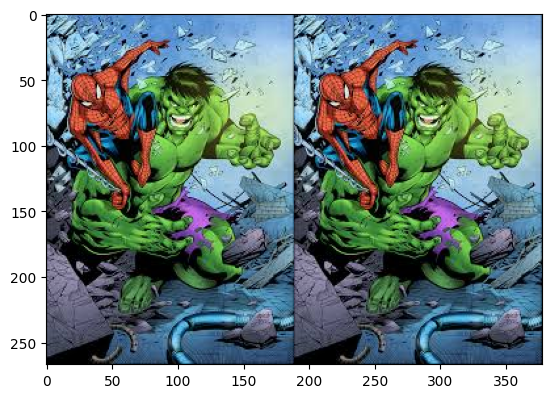

In [17]:
#OPCION 1 - Usando el método de la libería CV2
imgRGB1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#OPCION 2 - Intercambiando el orden de las matrices
imgRGB2 = img[:,:,::-1]

#Stack de imagenes para comparar
imgRGBStacked = np.hstack([imgRGB1, imgRGB2])

#Mostrando las imagenes
plt.imshow(imgRGBStacked)
plt.show()

Separando Canales

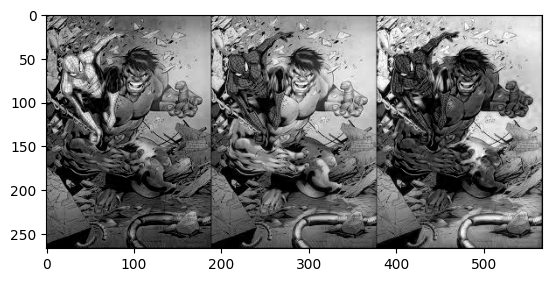

In [18]:
#Stack de imagenes para comparar
imgCanalesStacked = np.hstack([img[:,:,2], img[:,:,1], img[:,:,0] ])

#Mostrando las imagenes
plt.imshow(imgCanalesStacked, cmap='gray')
plt.show()

In [19]:
#funcion para extraer una parte de una imagen
def extract_subimg(img: np.ndarray, xinf: int, xsup: int, yinf: int,  ysup: int) -> np.ndarray | None :
  if xinf < 0 or xsup < 0 or yinf < 0 or ysup < 0 or xinf >= img.shape[0] or xsup >= img.shape[0] or yinf >= img.shape[1] or ysup >= img.shape[1]:
    print("Indices fuera de rango, Tamaño de la imagen " + str(img.shape[0]) + "x" + str(img.shape[1]))
    return None
  if xinf>=xsup or yinf>=ysup:
    print("Inconsistencia de coordenadas, las coordenandas inferiores deben ser menores a las superiores")
    return None
  return img[xinf:xsup, yinf:ysup]

#funcion para extraer un pixel
def extract_pixel(img: np.ndarray, x: int, y: int) -> np.ndarray | None :
  if x < 0 or y < 0 or x >= img.shape[0] or y >= img.shape[1]:
    print("Indices fuera de rango, Tamaño de la imagen " + str(img.shape[0]) + "x" + str(img.shape[1]))
    return None
  return img[x,y]




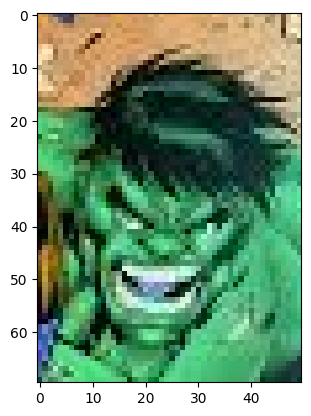

In [20]:
#probando extraer subimagen
testimg = extract_subimg(img,30,100,80,130)
if testimg.any():
  plt.imshow(testimg)
  plt.show()

In [21]:
#probando extraer pixel
testpxl = extract_pixel(img,100,100)
print(testpxl)

[ 12 127  53]


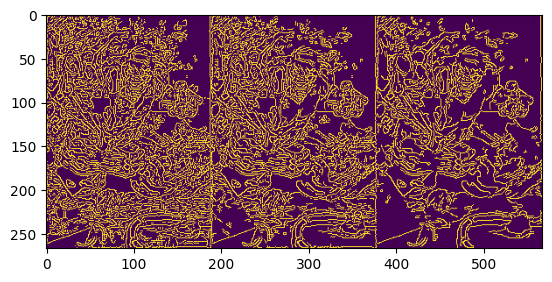

In [22]:
#Deteccion de bordes (Canny)

#probando distintos parámetros
img_Can = np.hstack((cv2.Canny(img, 50, 100), cv2.Canny(img, 100, 200),cv2.Canny(img, 200, 400)))
plt.imshow(img_Can)
plt.show()


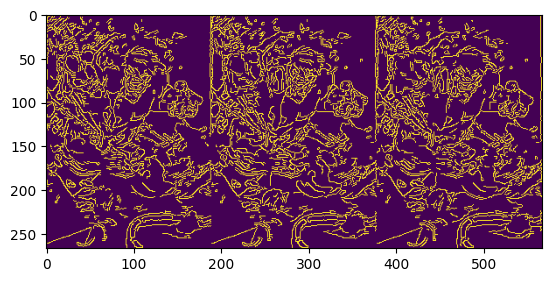

In [23]:
#Deteccion de bordes (Canny)

#probando en los distintos canales R, G y B
img_Can = np.hstack((cv2.Canny(img[:,:,2], 200, 400), cv2.Canny(img[:,:,1], 200, 400),cv2.Canny(img[:,:,0], 200, 400)))
plt.imshow(img_Can)
plt.show()

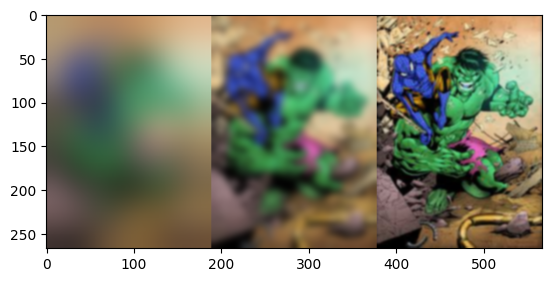

In [24]:
#Filtro gaussiano

#probando distintos parámetros
img_Blur = np.hstack([cv2.GaussianBlur(img, (125,125), 0), cv2.GaussianBlur(img, (25,25), 0), cv2.GaussianBlur(img, (5,5), 0)])
plt.imshow(img_Blur)
plt.show()

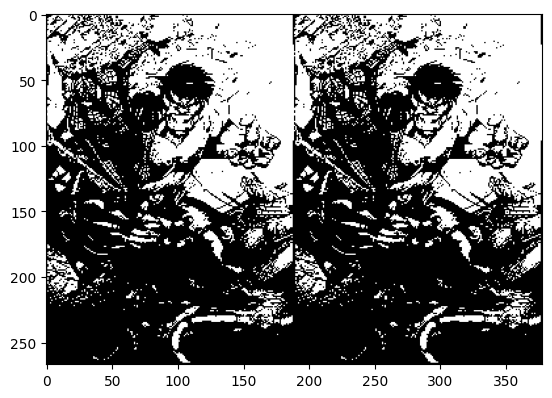

In [25]:
#pasando a Blanco y Negro

thresh = 127 # Valor que separa de los blancos y los negros

#con la librería CV2
img_bw1 = cv2.threshold(imgGray1, thresh, 255, cv2.THRESH_BINARY)[1]

#Manipulando Matrices con numpy
img_bw2 = np.where(imgGray1 > thresh, 255, 0)

#Mostrando la matrices
img_bw = np.hstack((img_bw1, img_bw2))
plt.imshow(img_bw, cmap='gray')
plt.show()

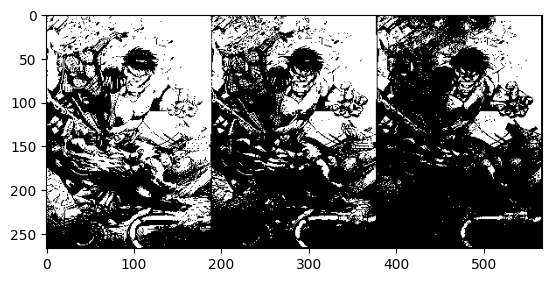

In [26]:
#Comparando con distintos Threshold
imgs_bw = np.hstack((np.where(imgGray1 > 100, 255, 0), np.where(imgGray1 > 127, 255, 0), np.where(imgGray1 > 150, 255, 0)))
plt.imshow(imgs_bw, cmap='gray')
plt.show()